<a href="https://www.kaggle.com/code/garysuen/titanic-eda-and-modelling?scriptVersionId=112939234" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
print(pd.__version__)

1.3.5


In [4]:
train_df_raw = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df_raw = pd.read_csv('/kaggle/input/titanic/test.csv')
combine_raw = pd.concat([train_df_raw,test_df_raw])

## First look on the data
* Null value exist on columns 'Age', 'Fare' , 'Cabin' and 'Embarked'

In [5]:
combine_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [6]:
combine_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Cleaning data - 5 steps
1. Make a copy
    * So that even if there are any mistakes , it will not impact the raw data
2. Correcting
    * Look for any outliner or aberrant values in the data
3. Completing 
    * Completing missing information 
4. Creating 
    * Creating new features for analysis
5. Converting 
    * Converting fields to the correct format for calculations and presentation




### 1. Make a Copy

In [9]:
# make a copy of the data
train_df = train_df_raw.copy()
test_df = test_df_raw.copy()
combine = [train_df,test_df]

## Correcting
* Look for any outliner or aberrant values in the data
Among the columns 
* Columns 'Survived' , 'Pclass' , 'Sex' , 'Embarked' are categortical value 
    * Action: check to ensure all data are corrected input for corresponding categorical value
* Columns 'Age' , 'Fare' are numberical data
    * Action: check to confirm the data is in reasonable range
* Column 'Name' , noimals data in text type without a standard format
    * Action: Try to extract useful information by feature engineering
* Column 'Ticket' noimals data om text type without a standard format while the ticket number seems may not have meaningful information that correlate with the our goal (Survived)
    * Action: drop this column at the moment
* Column 'Cabin' have over half of its value are null value which make it not suitable for using its as input for modeling , 
    * Action :drop this columns at the moment

In [10]:
for df in combine:
    df.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [11]:
cat_col = ['Survived','Pclass','Sex','Embarked']
train_df.name,test_df.name = 'train data','test data'

for col in cat_col:
    for data in combine:
        if col in data.columns:
            print('Columns {} of dataset {} have the category of '.format(col,data.name),data[col].unique())
            
#all categorical data have no outliners and aberrant values

Columns Survived of dataset train data have the category of  [0 1]
Columns Pclass of dataset train data have the category of  [3 1 2]
Columns Pclass of dataset test data have the category of  [3 2 1]
Columns Sex of dataset train data have the category of  ['male' 'female']
Columns Sex of dataset test data have the category of  ['male' 'female']
Columns Embarked of dataset train data have the category of  ['S' 'C' 'Q' nan]
Columns Embarked of dataset test data have the category of  ['Q' 'S' 'C']


In [12]:
num_col = ['Age','Fare']

for col in num_col:
    for data in combine:
        print(data.name,col)
        print(data[col].describe())
        
# all num_columns are within reasonable range

train data Age
count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64
test data Age
count   332.00
mean     30.27
std      14.18
min       0.17
25%      21.00
50%      27.00
75%      39.00
max      76.00
Name: Age, dtype: float64
train data Fare
count   891.00
mean     32.20
std      49.69
min       0.00
25%       7.91
50%      14.45
75%      31.00
max     512.33
Name: Fare, dtype: float64
test data Fare
count   417.00
mean     35.63
std      55.91
min       0.00
25%       7.90
50%      14.45
75%      31.50
max     512.33
Name: Fare, dtype: float64


# Completing 

Processing columns with null values include 'Age', 'Fare' , 'Cabin' and 'Embarked'
* Age - Completing the missing columns by the median of age in the grouped by 'Pclass' and 'Sex'
* Fare - Only one value is missing, fill by mean of value of its Pclass
* Cabin - to be dropped
* Embarked - Only two value are missing , fill by Mode

In [13]:
# get the median of age by group of Pclass and Sex
age_median = pd.concat(combine).groupby(['Pclass','Sex'])['Age'].median().to_dict()
print(age_median)

# Function to fill na value for a columns according to the value of other 2 columns (Pclass and Sex) 
def fill_age_2col(col1,col2,col3,dict):
    cols =(col2,col3)
    if pd.isnull(col1):
        return dict[cols]
    else :
        return col1

for df in combine:
    df['Age_c'] = df.apply(lambda x: fill_age_2col(x['Age'],x['Pclass'],x['Sex'],age_median),axis=1)
    df.drop('Age',axis=1,inplace=True)

{(1, 'female'): 36.0, (1, 'male'): 42.0, (2, 'female'): 28.0, (2, 'male'): 29.5, (3, 'female'): 22.0, (3, 'male'): 25.0}


In [14]:
# get the mean of Fare by group of Pclass
Fare_mean= pd.concat(combine).groupby(['Pclass'])['Fare'].mean().round(0).to_dict()
print(Fare_mean)

def fill_age_1col(col1,col2,dict):
    if pd.isnull(col1):
        return dict[col2]
    else :
        return col1

for df in combine:
    df['Fare_c'] = df.apply(lambda x: fill_age_1col(x['Fare'],x['Pclass'],Fare_mean),axis=1)
    df.drop('Fare',axis=1,inplace=True)

{1: 88.0, 2: 21.0, 3: 13.0}


In [15]:
# get mode of Embarked
Embarked_mode = pd.concat(combine)['Embarked'].mode()
print(Embarked_mode)

for df in combine:
    df['Embarked'].fillna(Embarked_mode,inplace=True)

0    S
dtype: object


In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Age_c,Fare_c
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,S,22.00,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,38.00,71.28
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,S,26.00,7.92
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,35.00,53.10
4,5,0,3,"Allen, Mr. William Henry",male,0,0,S,35.00,8.05


# Creating
* Name
    * Title can be extracted for analysis
    * first name will not be processed as it seems not have correlation with the goal(whether the passenger survivied)
    * last name will not be processed as it shall be well covered by familiy member
* Age
    * Can be put into groups
* SibSp and Parch 
    * both are representing family member of different kind
    * To be combined as familiy member (fam_mem) 
    * Can be put into groups after combined
* Fare
    * Can be put into groups



In [17]:
# Extract title from name
# droping unused columns after extacting features 

for df in combine:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df.drop('Name',axis=1,inplace=True)
    
Title = pd.concat(combine)['Title'].value_counts().index.to_numpy()
Title_gp = ['Mr','Miss','Mrs','Master']
# Separate into 5 groups [Mr,Miss,Mrs,Master and others]

for df in combine: 
    df['Title_c'] = df['Title'].apply(lambda x : x if x in Title_gp else 'others')
    
print(pd.concat(combine)['Title_c'].value_counts())

Mr        757
Miss      260
Mrs       197
Master     61
others     34
Name: Title_c, dtype: int64


               Sur_rate  Counts
Age_gp                         
(-0.001, 5.0]     70.45      44
(5.0, 10.0]       35.00      20
(10.0, 15.0]      57.89      19
(15.0, 20.0]      34.38      96
(20.0, 25.0]      29.46     258
(25.0, 30.0]      38.66     119
(30.0, 35.0]      46.59      88
(35.0, 40.0]      48.68      76
(40.0, 45.0]      32.35      68
(45.0, 50.0]      41.03      39
(50.0, 55.0]      41.67      24
(55.0, 60.0]      38.89      18
(60.0, 65.0]      28.57      14
(65.0, 70.0]       0.00       3
(70.0, 75.0]       0.00       4
(75.0, 80.0]     100.00       1


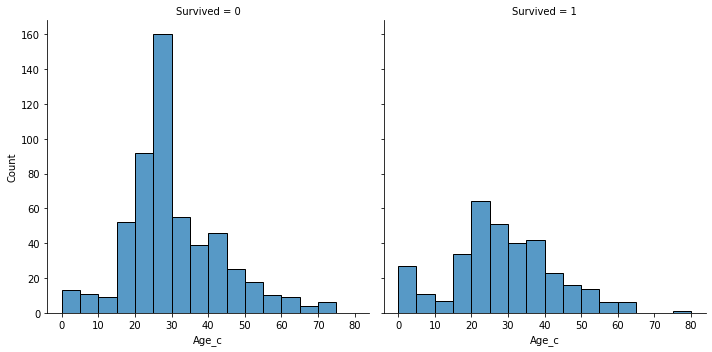

In [18]:
# Exploring survial rate across age to better put age into groups
train_df['Age_gp'] = pd.cut(train_df['Age_c'], bins=np.arange(0,pd.concat(combine)['Age_c'].max()+5,5),include_lowest=True)
age_sur_rate = train_df.groupby(['Age_gp'])['Survived'].sum()/train_df.groupby(['Age_gp'])['Survived'].count()*100
age_gp_cout = train_df.groupby(['Age_gp'])['Survived'].count()
print(pd.DataFrame({'Sur_rate':age_sur_rate,'Counts':age_gp_cout}))

age_dist = sns.displot(data=train_df,x='Age_c',col='Survived',binwidth=5,binrange=[0,80])

In [19]:
# group the age for 0-5,5-10,10-15,15-30,30-60,60-80 which have simlar survival rate
for df in combine:
    df['Age_gp'] = pd.cut(df['Age_c'], bins=[0,5,10,15,30,60,80],include_lowest=True)


In [20]:
# adding sibsp and parch to be fam_mem
# droping unused columns after extacting features 
for df in combine:
    df['fam_mem']=df['SibSp']+df['Parch']
    df.drop(['SibSp','Parch'],axis=1,inplace=True)
    
print(train_df.pivot_table(index=['fam_mem'],columns=['Survived'],values=['PassengerId'],aggfunc='count'))
# regroup fam_mem to [0,1,2,3,4-6,>7] 

for df in combine:
    df['fam_mem_gp'] = pd.cut(df['fam_mem'], bins=[-1,0,1,2,3,6,df['fam_mem'].max()])

         PassengerId       
Survived           0      1
fam_mem                    
0             374.00 163.00
1              72.00  89.00
2              43.00  59.00
3               8.00  21.00
4              12.00   3.00
5              19.00   3.00
6               8.00   4.00
7               6.00    NaN
10              7.00    NaN


In [21]:
# grouping fare according to quartiles
for df in combine:
    df['Fare_gp'] = pd.qcut(df['Fare_c'],4)
    print(df['Fare_gp'].value_counts().sort_index())

(-0.001, 7.91]     223
(7.91, 14.454]     224
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare_gp, dtype: int64
(-0.001, 7.896]      114
(7.896, 14.454]       97
(14.454, 31.472]     102
(31.472, 512.329]    105
Name: Fare_gp, dtype: int64


In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Age_c,Fare_c,Title,Title_c,Age_gp,fam_mem,fam_mem_gp,Fare_gp
0,1,0,3,male,S,22.00,7.25,Mr,Mr,"(15.0, 30.0]",1,"(0, 1]","(-0.001, 7.91]"
1,2,1,1,female,C,38.00,71.28,Mrs,Mrs,"(30.0, 60.0]",1,"(0, 1]","(31.0, 512.329]"
2,3,1,3,female,S,26.00,7.92,Miss,Miss,"(15.0, 30.0]",0,"(-1, 0]","(7.91, 14.454]"
3,4,1,1,female,S,35.00,53.10,Mrs,Mrs,"(30.0, 60.0]",1,"(0, 1]","(31.0, 512.329]"
4,5,0,3,male,S,35.00,8.05,Mr,Mr,"(30.0, 60.0]",0,"(-1, 0]","(7.91, 14.454]"


double check after data is correct , complete and create

In [23]:
for df in combine:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Embarked     889 non-null    object  
 5   Age_c        891 non-null    float64 
 6   Fare_c       891 non-null    float64 
 7   Title        891 non-null    object  
 8   Title_c      891 non-null    object  
 9   Age_gp       891 non-null    category
 10  fam_mem      891 non-null    int64   
 11  fam_mem_gp   891 non-null    category
 12  Fare_gp      891 non-null    category
dtypes: category(3), float64(2), int64(4), object(4)
memory usage: 73.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       ---

# Converting
converting data into type that suitable to input to model
Features/labels no need to convert
* Survived
* Pclass

The following features(columns) will be converted 
* Sex
* Title (Title_c)
* Age (Age_gp)
* Embarked(Embarked)
* family member (fam_mem)
* Fare (Fare_gp)

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Age_c,Fare_c,Title,Title_c,Age_gp,fam_mem,fam_mem_gp,Fare_gp
0,1,0,3,male,S,22.00,7.25,Mr,Mr,"(15.0, 30.0]",1,"(0, 1]","(-0.001, 7.91]"
1,2,1,1,female,C,38.00,71.28,Mrs,Mrs,"(30.0, 60.0]",1,"(0, 1]","(31.0, 512.329]"
2,3,1,3,female,S,26.00,7.92,Miss,Miss,"(15.0, 30.0]",0,"(-1, 0]","(7.91, 14.454]"
3,4,1,1,female,S,35.00,53.10,Mrs,Mrs,"(30.0, 60.0]",1,"(0, 1]","(31.0, 512.329]"
4,5,0,3,male,S,35.00,8.05,Mr,Mr,"(30.0, 60.0]",0,"(-1, 0]","(7.91, 14.454]"


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label=LabelEncoder()

for df in combine:
    df['Sex_code']=label.fit_transform(df['Sex'])
    df['Title_code']=label.fit_transform(df['Title_c'])
    df['Age_code']=label.fit_transform(df['Age_gp'])
    df['Embarked_code']=label.fit_transform(df['Embarked'])
    df['fam_mem_code']=label.fit_transform(df['fam_mem'])
    df['Fare_code']=label.fit_transform(df['Fare_gp'])

X_train = train_df[['Pclass','Sex_code','Title_code','Age_code','Embarked_code','fam_mem_code','Fare_code']]
y_train = train_df['Survived']
X_test = test_df[['Pclass','Sex_code','Title_code','Age_code','Embarked_code','fam_mem_code','Fare_code']]

# Exploratory analysis


In [27]:
#Correlation with Survived
train_df.corr().loc['Survived'].sort_values()

Sex_code        -0.54
Pclass          -0.34
Embarked_code   -0.16
Age_code        -0.09
Age_c           -0.06
Title_code      -0.05
PassengerId     -0.01
fam_mem          0.02
fam_mem_code     0.03
Fare_c           0.26
Fare_code        0.30
Survived         1.00
Name: Survived, dtype: float64

<AxesSubplot:>

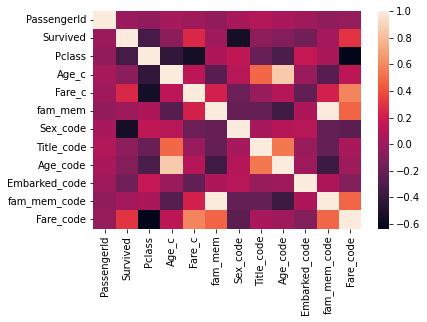

In [28]:
sns.heatmap(train_df.corr())

## Findings

* Pclass
    * Shown correlation with survival rate 
    * Higher class have higher chance of survived
* Sex
    * Female have higher chance for survival compare to male
* Age
    * Majority of passenger are in the age of 15-40 years old.
    * Children whose age below 5 have a higher survival rate
    * Passenger with age 15-40 have a lower survial rate
* sibsp and parch
    * the features , Sibsp (sibiling and spouse) and parch(Parent and children) have similar meaning which are both refer to number of relatives on board and 
    * have simlar relationship with the survival rate , both the increase sibsp and parch are come with the drop of survival rate
    * Action - create a new metrics , fam_mem ,  by combing sibsp and parch as an input for the algorithm
* Fare 
    * Fare and Pclass are highly correlated with r^2 = -0.55
    * higher fare come with higher survived rate

In [29]:
# Pclass is correlated with Survived with higher class have higher chance of survived
print('Survived Rate per Pclass')
Pclass_sur = train_df.pivot_table(index=['Pclass'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
Pclass_sur[[('rate',0),('rate',1)]] = Pclass_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
Pclass_sur.rename({'PassengerId':'count'},axis=1).fillna(0)

Survived Rate per Pclass


count       rate      
Survived     0    1     0     1
Pclass                         
1           80  136 37.04 62.96
2           97   87 52.72 47.28
3          372  119 75.76 24.24

In [30]:
# Female have a higher Survived rate than female
print('Survived Rate per Sex')
sex_sur = train_df.pivot_table(index=['Sex'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
sex_sur[[('rate',0),('rate',1)]] = sex_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
sex_sur.rename({'PassengerId':'count'},axis=1).fillna(0)

Survived Rate per Sex


count       rate      
Survived     0    1     0     1
Sex                            
female      81  233 25.80 74.20
male       468  109 81.11 18.89

In [31]:
# Surival rata peaked at passenger with 3 family members on board

print('Survived Rate per family member')
fam_mem_sur = train_df.pivot_table(index=['fam_mem_gp'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
fam_mem_sur[[('rate',0),('rate',1)]] = fam_mem_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
fam_mem_sur = fam_mem_sur.rename({'PassengerId':'count'},axis=1).fillna(0)
fam_mem_sur

Survived Rate per family member


count        rate      
Survived       0    1      0     1
fam_mem_gp                        
(-1, 0]      374  163  69.65 30.35
(0, 1]        72   89  44.72 55.28
(1, 2]        43   59  42.16 57.84
(2, 3]         8   21  27.59 72.41
(3, 6]        39   10  79.59 20.41
(6, 10]       13    0 100.00  0.00

r^2 of Fare and Pclass:  -0.55


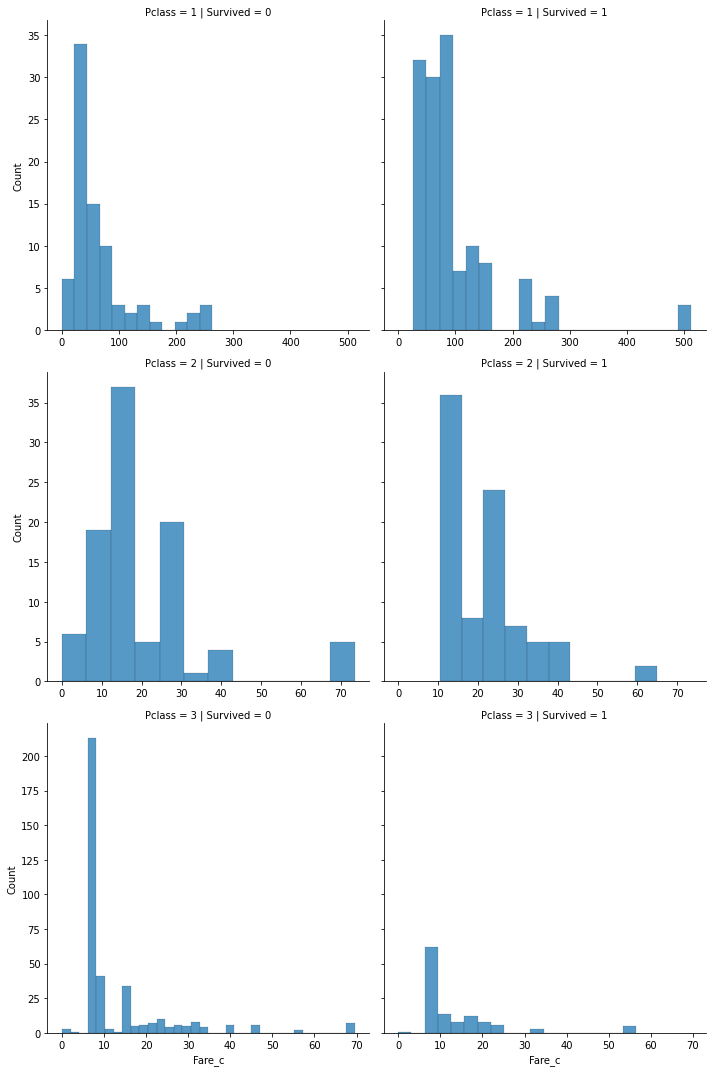

In [32]:
# Fare and Pclass are highly correlated with r^2 = -0.55
# higher fare come with higher survived rate
print('r^2 of Fare and Pclass: ','%.2f' % train_df.corr().loc['Pclass','Fare_c'])
Fare_dist = sns.displot(data=train_df,x='Fare_c',col='Survived',row='Pclass',facet_kws={'sharey':'row','sharex':'row'},common_bins=False)

In [33]:
# Passenger who embarked from Cherbourg have a higher rate of surviving compare to Queenstown and Southampton
Embarked_sur = train_df.pivot_table(index=['Embarked'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
Embarked_sur[[('rate',0),('rate',1)]] = Embarked_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
Embarked_sur = Embarked_sur.rename({'PassengerId':'count'},axis=1).fillna(0)
Embarked_sur

count       rate      
Survived     0    1     0     1
Embarked                       
C           75   93 44.64 55.36
Q           47   30 61.04 38.96
S          427  217 66.30 33.70

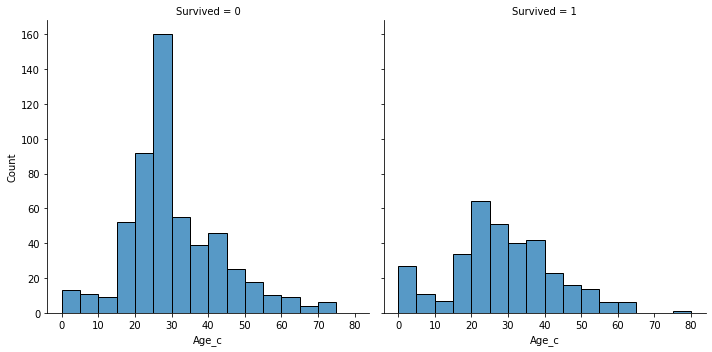

In [34]:
# Majority of passenger are in the age of 15-40 years old.
# Children whose age below 5 have a higher survival rate
# Passenger with age 15-40 have a lower survial rate
age_dist = sns.displot(data=train_df,x='Age_c',col='Survived',binwidth=5,binrange=[0,80])

# Modeling & Predicting

# KNN Model

In [35]:
from sklearn import neighbors, metrics
from sklearn import model_selection
from sklearn import metrics

In [36]:
#split data in cross validation
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
Scores = pd.DataFrame(columns=['Model name','Model','CV_score','params'])

In [37]:
#Create model
knn = neighbors.KNeighborsClassifier(n_neighbors=36,weights='distance')


#train the model
knn.fit(X_train , y_train)

#get prediction
y_predict = knn.predict(X_test)

# get score
knn_score = round(knn.score(X_train,y_train),2)*100

#get result from cross validation
cv_results = model_selection.cross_validate(knn, X_train, y_train, cv  = cv_split)
knn_cv_score = round(cv_results['test_score'].mean(),2)*100

#setting up parameter for best parameter search 
# The KNN method is a simple method which does not need too much tuning 
# The main purpose for these searching would be to search for the K & weights only 
Scores.loc[0]=['knn',knn,knn_cv_score,knn.get_params()]
param_grid = {'algorithm': ['auto'],
 'leaf_size': np.arange(20,51,10),
 'metric': ['minkowski'],
 'metric_params': [None],
 'n_jobs': [None],
 'n_neighbors': np.arange(10,41,10),
 'p': [1,2],
 'weights': ['uniform','distance']}

#tuning parameter by gridsearch
knn_tuned = model_selection.GridSearchCV(knn, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
knn_tuned.fit(X_train, y_train)

Scores.loc[1]=['knn_tuned',knn_tuned,knn_tuned.cv_results_['mean_test_score'][knn_tuned.best_index_]*100,knn_tuned.best_params_]
Scores

,Model name,Model,CV_score,params
0,knn,"KNeighborsClassifier(n_neighbors=36, weights='...",80.00,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
1,knn_tuned,"GridSearchCV(cv=ShuffleSplit(n_splits=10, rand...",86.82,"{'algorithm': 'auto', 'leaf_size': 40, 'metric..."


# Support_Vector_Machine(SVC) model

In [38]:
from sklearn import svm
#Create model
svm = svm.SVC()

#set up parameter grid for grid search
param_grid_svc = {'C': [0.001,0.1,1,10,1000],
 'break_ties': [False],
 'cache_size': [200],
 'class_weight': [None,'balanced'],
 'coef0': [0.0],
 'decision_function_shape': ['ovr'],
 'degree': [3],
 'gamma': ['scale'],
 'kernel': ['rbf','sigmoid'],
 'max_iter': [-1],
 'probability': [False],
 'random_state': [None],
 'shrinking': [True],
 'tol': [0.001],
 'verbose': [False]}

#set the model with grid search
svm_tuned = model_selection.GridSearchCV(svm, param_grid=param_grid_svc, scoring = 'roc_auc', cv = cv_split)

# train the model
svm_tuned.fit(X_train, y_train)

Scores.loc[2]=['svm_tuned',svm_tuned,svm_tuned.cv_results_['mean_test_score'][svm_tuned.best_index_]*100,svm_tuned.best_params_]

# Random Forest

In [39]:
X_train.shape[0]

891

In [40]:
from sklearn.ensemble import  RandomForestClassifier

# Creat Model
rfc = RandomForestClassifier()

#set up parameter grid for grid search
param_grid_rfc={
'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': [None],
 'criterion': ['gini','entropy'],
 'max_depth': [None],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [0.5,0.6,0.7,0.8,0.9,None],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [1,2,5,10],
 'min_samples_split': [2,5,10],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [100],
 'n_jobs': [None],
 'oob_score': [True],
 'random_state': [None],
 'verbose': [0],
 'warm_start': [False]}

#set the model with grid search
rfc_tuned = model_selection.GridSearchCV(rfc, param_grid=param_grid_rfc, scoring = 'roc_auc', cv = cv_split)

# train the model
rfc_tuned.fit(X_train, y_train)

Scores.loc[3]=['rfc_tuned',rfc_tuned,rfc_tuned.cv_results_['mean_test_score'][rfc_tuned.best_index_]*100,rfc_tuned.best_params_]

In [41]:
Scores

,Model name,Model,CV_score,params
0,knn,"KNeighborsClassifier(n_neighbors=36, weights='...",80.00,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
1,knn_tuned,"GridSearchCV(cv=ShuffleSplit(n_splits=10, rand...",86.82,"{'algorithm': 'auto', 'leaf_size': 40, 'metric..."
2,svm_tuned,"GridSearchCV(cv=ShuffleSplit(n_splits=10, rand...",86.21,"{'C': 10, 'break_ties': False, 'cache_size': 2..."
3,rfc_tuned,"GridSearchCV(cv=ShuffleSplit(n_splits=10, rand...",88.56,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."


# Conclusion
Among the 3 models used to predict whether a passenger is surured in titanic , Random Forest are the one with the highest score from the result obntained from cross validation, with score of 88.55.

# Prediciton and submission

In [42]:
Scores['predict'] = [pd.DataFrame({'PassengerId': test_df['PassengerId'],'Survived':model.predict(X_test)}) for model in [knn,knn_tuned,svm_tuned,rfc_tuned]]

In [43]:
Scores['predict'][3].to_csv('/kaggle/working/rfc.csv',index=False)
Scores['predict'][2].to_csv('/kaggle/working/svm.csv',index=False)
Scores['predict'][1].to_csv('/kaggle/working/knn.csv',index=False)